<a href="https://colab.research.google.com/github/zahraziran/Smart-Home/blob/main/Copy_of_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

!ls "/content/drive/My Drive/Energy_Consumption"

df_holiday_encode.pickle.gz  df_merged.pickle.gz   Floors	    Smart_Environments.pptx
df_holiday.pickle.gz	     df_weather.pickle.gz  Note_Links.gdoc


In [3]:
import os
import pandas as pd


root_path = "/content/drive/My Drive/Energy_Consumption"


In [4]:
feature_selected = "Floor1_z3_Light(kW)"


In [5]:
import os
for dirname, _, filenames in os.walk("/content/drive/My Drive/Energy_Consumption" + "/Floors"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Energy_Consumption/Floors/2018Floor1.csv
/content/drive/My Drive/Energy_Consumption/Floors/2018Floor2.csv
/content/drive/My Drive/Energy_Consumption/Floors/2018Floor3.csv
/content/drive/My Drive/Energy_Consumption/Floors/2018Floor4.csv
/content/drive/My Drive/Energy_Consumption/Floors/2018Floor5.csv
/content/drive/My Drive/Energy_Consumption/Floors/2018Floor6.csv
/content/drive/My Drive/Energy_Consumption/Floors/2018Floor7.csv
/content/drive/My Drive/Energy_Consumption/Floors/2019Floor1.csv
/content/drive/My Drive/Energy_Consumption/Floors/2019Floor2.csv
/content/drive/My Drive/Energy_Consumption/Floors/2019Floor3.csv
/content/drive/My Drive/Energy_Consumption/Floors/2019Floor4.csv
/content/drive/My Drive/Energy_Consumption/Floors/2019Floor5.csv
/content/drive/My Drive/Energy_Consumption/Floors/2019Floor6.csv
/content/drive/My Drive/Energy_Consumption/Floors/2019Floor7.csv
/content/drive/My Drive/Energy_Consumption/Floors/df_holiday.pickle.gz
/content/drive/My D

In [6]:
path_file = "/content/drive/My Drive/Energy_Consumption" + "/Floors"

In [7]:
df_data = pd.read_pickle(os.path.join(path_file, 'df_merged.pickle.gz'))
df_data

,Floor1_z1_Light(kW),Floor1_z1_Plug(kW),Floor1_z2_AC1(kW),Floor1_z2_AC2(kW),Floor1_z2_AC3(kW),Floor1_z2_AC4(kW),Floor1_z2_Light(kW),Floor1_z2_Plug(kW),Floor1_z3_Light(kW),Floor1_z3_Plug(kW),...,Floor7_z4_Plug(kW),Floor7_z4_S1(RH%),Floor7_z4_S1(degC),Floor7_z4_S1(lux),Floor7_z5_AC1(kW),Floor7_z5_Light(kW),Floor7_z5_Plug(kW),Floor7_z5_S1(RH%),Floor7_z5_S1(degC),Floor7_z5_S1(lux)
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,...,0.00,65.16,29.40,0.0,0.0,0.0,0.03,66.72,28.93,0.0
2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,...,0.00,65.17,29.30,0.0,0.0,0.0,0.03,66.70,28.92,0.0
2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,...,0.00,65.18,29.30,0.0,0.0,0.0,0.05,66.70,28.92,0.0
2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,...,0.00,65.18,29.30,0.0,0.0,0.0,0.14,66.70,28.92,0.0
2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,...,0.00,65.18,29.40,0.0,0.0,0.0,0.13,66.70,28.92,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:55:00,0.02,0.01,2.22,0.03,0.00,0.01,8.85,27.00,10.98,1.25,...,0.07,55.96,28.50,0.0,0.0,0.0,0.03,52.86,29.43,0.0
2019-12-31 23:56:00,0.02,0.02,13.14,0.02,0.01,0.00,8.86,27.15,10.98,1.25,...,0.07,55.96,28.49,0.0,0.0,0.0,0.03,52.87,29.43,0.0
2019-12-31 23:57:00,0.01,0.01,51.20,0.03,0.01,0.01,8.90,20.62,11.03,1.24,...,0.07,56.00,28.50,0.0,0.0,0.0,0.03,52.84,29.42,0.0


In [8]:
# Leave columns with keyword of 'kW'
df_powerMeter = df_data.loc[:, df_data.columns.str.contains('kW')].copy()
df_powerMeter = df_powerMeter.sum(axis=1).rename('total_demand')
df_powerMeter = df_powerMeter.resample('H').mean()
df_powerMeter

Date
2018-07-01 00:00:00    176.261667
2018-07-01 01:00:00    177.300000
2018-07-01 02:00:00    177.048833
2018-07-01 03:00:00    175.129167
2018-07-01 04:00:00    183.175000
                          ...    
2019-12-31 19:00:00    120.144500
2019-12-31 20:00:00    124.547667
2019-12-31 21:00:00    104.895333
2019-12-31 22:00:00     95.204167
2019-12-31 23:00:00     91.057667
Freq: H, Name: total_demand, Length: 13176, dtype: float64

<Axes: xlabel='Date'>

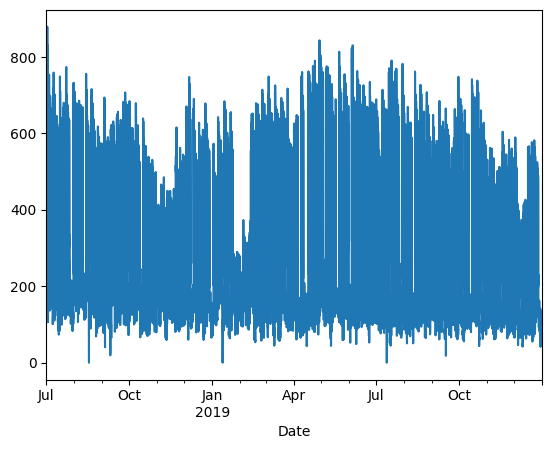

In [9]:
df_powerMeter.plot()

In [10]:
# Prepare data for modeling
df_temp = df_powerMeter.reset_index().copy()
df_temp = df_temp.dropna()

# Add timestamp features
df_temp['weekday'] = df_temp['Date'].dt.weekday
df_temp['hour'] = df_temp['Date'].dt.hour
df_temp['date'] =pd.to_datetime(df_temp['Date'].dt.date)

df_temp = df_temp.set_index('Date').drop(['date'],axis=1)

df_temp = df_temp.rename(columns={'total_demand':'total_demand_meas'})

df_temp

,total_demand_meas,weekday,hour
Date,,,
2018-07-01 00:00:00,176.261667,6,0
2018-07-01 01:00:00,177.300000,6,1
2018-07-01 02:00:00,177.048833,6,2
2018-07-01 03:00:00,175.129167,6,3
2018-07-01 04:00:00,183.175000,6,4
...,...,...,...
2019-12-31 19:00:00,120.144500,1,19
2019-12-31 20:00:00,124.547667,1,20
2019-12-31 21:00:00,104.895333,1,21


<Axes: xlabel='weekday,hour'>

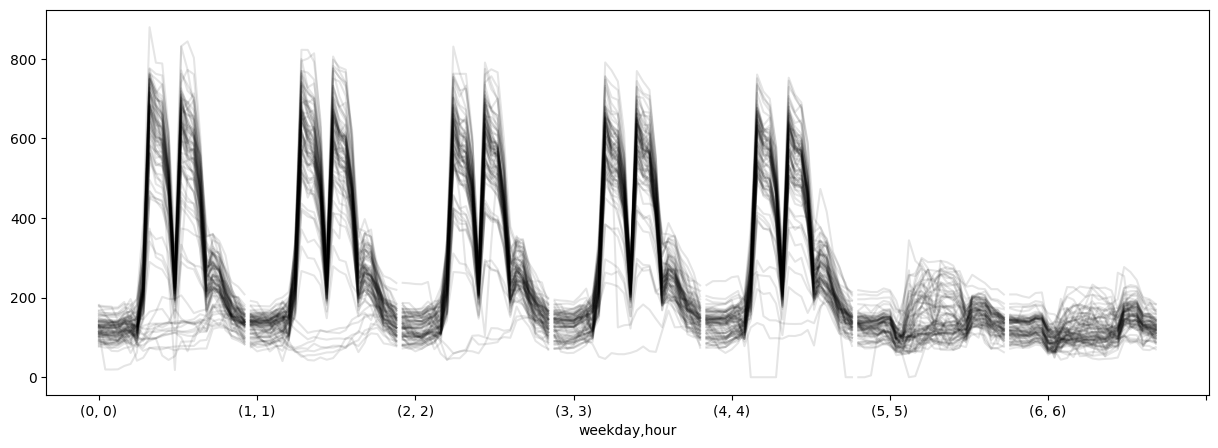

In [11]:
# Weekly profiles of building energy
df_plot = df_temp.copy()
df_plot['date'] = pd.to_datetime(df_plot.index.date)
df_plot.pivot_table(columns=['weekday','hour'], index='date', values='total_demand_meas').T.plot(figsize=(15,5),color='black',alpha=0.1,legend=False)

In [12]:
df_data = df_data[:10000]

In [13]:
display(df_data)

,Floor1_z1_Light(kW),Floor1_z1_Plug(kW),Floor1_z2_AC1(kW),Floor1_z2_AC2(kW),Floor1_z2_AC3(kW),Floor1_z2_AC4(kW),Floor1_z2_Light(kW),Floor1_z2_Plug(kW),Floor1_z3_Light(kW),Floor1_z3_Plug(kW),...,Floor7_z4_Plug(kW),Floor7_z4_S1(RH%),Floor7_z4_S1(degC),Floor7_z4_S1(lux),Floor7_z5_AC1(kW),Floor7_z5_Light(kW),Floor7_z5_Plug(kW),Floor7_z5_S1(RH%),Floor7_z5_S1(degC),Floor7_z5_S1(lux)
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,...,0.0,65.16,29.40,0.0,0.0,0.0,0.03,66.72,28.93,0.0
2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,...,0.0,65.17,29.30,0.0,0.0,0.0,0.03,66.70,28.92,0.0
2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,...,0.0,65.18,29.30,0.0,0.0,0.0,0.05,66.70,28.92,0.0
2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,...,0.0,65.18,29.30,0.0,0.0,0.0,0.14,66.70,28.92,0.0
2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,...,0.0,65.18,29.40,0.0,0.0,0.0,0.13,66.70,28.92,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-07 22:35:00,13.07,18.50,45.69,0.03,0.01,0.00,16.29,16.68,27.19,0.82,...,0.0,61.78,28.86,0.0,0.0,0.0,0.03,63.72,28.71,0.0
2018-07-07 22:36:00,13.05,18.47,45.62,0.03,0.01,0.00,16.27,16.64,26.07,0.82,...,0.0,61.80,28.86,0.0,0.0,0.0,0.03,63.72,28.70,0.0
2018-07-07 22:37:00,13.04,18.47,45.70,0.03,0.01,0.00,16.26,16.28,18.81,0.82,...,0.0,61.81,28.86,0.0,0.0,0.0,0.03,63.72,28.70,0.0


In [14]:
feature_selected = "Floor1_z3_Plug(kW)"

In [15]:
df_data = df_data[(df_data[feature_selected] > 0)]

In [16]:
df_data.describe()

,Floor1_z1_Light(kW),Floor1_z1_Plug(kW),Floor1_z2_AC1(kW),Floor1_z2_AC2(kW),Floor1_z2_AC3(kW),Floor1_z2_AC4(kW),Floor1_z2_Light(kW),Floor1_z2_Plug(kW),Floor1_z3_Light(kW),Floor1_z3_Plug(kW),...,Floor7_z4_Plug(kW),Floor7_z4_S1(RH%),Floor7_z4_S1(degC),Floor7_z4_S1(lux),Floor7_z5_AC1(kW),Floor7_z5_Light(kW),Floor7_z5_Plug(kW),Floor7_z5_S1(RH%),Floor7_z5_S1(degC),Floor7_z5_S1(lux)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9977.000000,10000.000000,10000.000000,...,10000.000000,9697.000000,9697.000000,9697.000000,10000.000000,10000.000000,10000.00000,9749.000000,9749.000000,9749.000000
mean,6.479193,10.783698,32.823078,6.830561,0.009231,0.008377,16.353633,15.813369,26.134615,0.969652,...,0.009041,61.777583,26.847821,18.148293,3.040930,1.863905,0.08949,61.651761,27.554322,28.011488
std,8.715369,8.230486,20.803556,14.303472,0.004116,0.008984,2.157108,1.989511,13.132250,0.314769,...,0.022006,4.517677,3.178012,21.218314,5.332134,2.044002,0.14587,5.190259,2.210255,31.338304
min,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,7.290000,4.740000,5.640000,0.200000,...,0.000000,50.760000,19.860000,0.000000,0.000000,0.000000,0.02000,47.470000,23.240000,0.000000
25%,0.010000,1.160000,2.120000,0.020000,0.010000,0.000000,14.437500,15.110000,18.600000,0.730000,...,0.000000,58.350000,24.730000,0.000000,0.000000,0.000000,0.03000,57.260000,24.960000,0.000000
50%,0.020000,11.360000,45.660000,0.020000,0.010000,0.010000,16.160000,15.800000,26.440000,0.840000,...,0.000000,62.340000,27.890000,2.000000,0.000000,0.000000,0.03000,63.210000,28.350000,0.000000
75%,12.940000,19.090000,46.680000,0.040000,0.010000,0.010000,18.600000,16.960000,29.490000,1.250000,...,0.000000,65.400000,28.800000,38.000000,8.997500,4.170000,0.11000,65.900000,28.960000,64.000000
max,45.720000,37.440000,55.900000,50.500000,0.020000,0.030000,29.730000,52.210000,120.630000,3.100000,...,0.090000,71.620000,32.900000,76.000000,20.400000,5.170000,2.01000,69.900000,31.900000,73.000000


In [ ]:
# df_data = df_data[:1000]

In [ ]:
# df_data['Date'] = pd.to_datetime(df_data['Date'])

In [17]:
# df_data=df_data.dropna()
# df_data.sort_index(inplace=True)

In [ ]:
# # we are choosing one of the consumptions
# # creating time series df



# series = pd.Series(df_data[feature_selected].tolist(), index=df_data['Date'])
# # df_time_series = df_data.set_index('Date')[feature_selected]
# series


In [18]:
df_data.isnull().any()

Floor1_z1_Light(kW)    False
Floor1_z1_Plug(kW)     False
Floor1_z2_AC1(kW)      False
Floor1_z2_AC2(kW)      False
Floor1_z2_AC3(kW)      False
                       ...  
Floor7_z5_Light(kW)    False
Floor7_z5_Plug(kW)     False
Floor7_z5_S1(RH%)       True
Floor7_z5_S1(degC)      True
Floor7_z5_S1(lux)       True
Length: 192, dtype: bool

In [19]:
df_data.head()

,Floor1_z1_Light(kW),Floor1_z1_Plug(kW),Floor1_z2_AC1(kW),Floor1_z2_AC2(kW),Floor1_z2_AC3(kW),Floor1_z2_AC4(kW),Floor1_z2_Light(kW),Floor1_z2_Plug(kW),Floor1_z3_Light(kW),Floor1_z3_Plug(kW),...,Floor7_z4_Plug(kW),Floor7_z4_S1(RH%),Floor7_z4_S1(degC),Floor7_z4_S1(lux),Floor7_z5_AC1(kW),Floor7_z5_Light(kW),Floor7_z5_Plug(kW),Floor7_z5_S1(RH%),Floor7_z5_S1(degC),Floor7_z5_S1(lux)
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,...,0.0,65.16,29.4,0.0,0.0,0.0,0.03,66.72,28.93,0.0
2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,...,0.0,65.17,29.3,0.0,0.0,0.0,0.03,66.70,28.92,0.0
2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,...,0.0,65.18,29.3,0.0,0.0,0.0,0.05,66.70,28.92,0.0
2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,...,0.0,65.18,29.3,0.0,0.0,0.0,0.14,66.70,28.92,0.0
2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,...,0.0,65.18,29.4,0.0,0.0,0.0,0.13,66.70,28.92,0.0


In [ ]:
# df_data = df_data[feature_selected]

<Axes: xlabel='Date'>

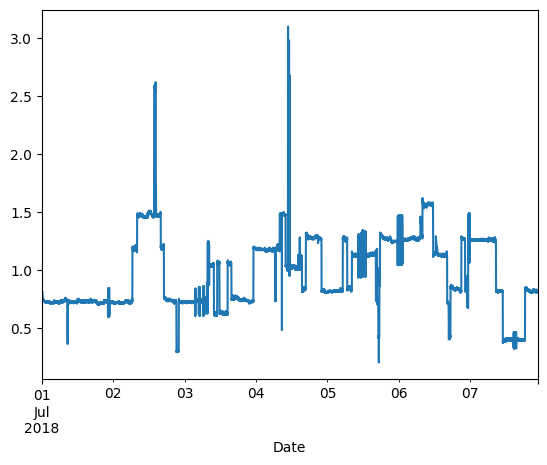

In [20]:
df_data[feature_selected].plot()

In [21]:
# firstly we check the data with adfuler test
from statsmodels.tsa import stattools
adf_result = stattools.adfuller(df_data[feature_selected], autolag='AIC')
print(f'The number of lags used: {adf_result[2]}')
print(f'The number of observations used: {adf_result[3]}')
for key, value in adf_result[4].items():
    print('Critial Values:')
    print(f' {key}, {round(value,4)}')

The number of lags used: 38
The number of observations used: 9961
Critial Values:
 1%, -3.431
Critial Values:
 5%, -2.8618
Critial Values:
 10%, -2.5669


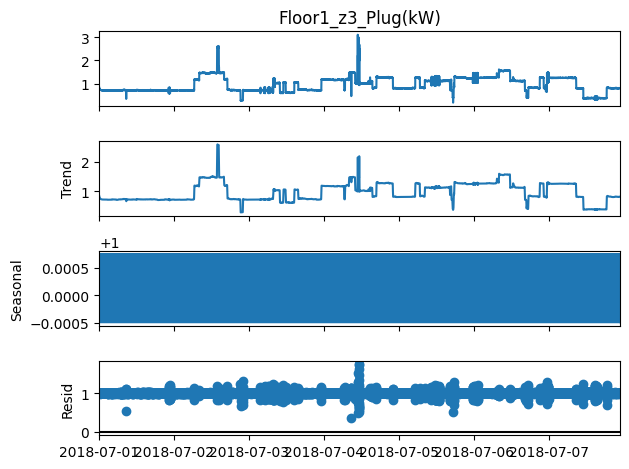

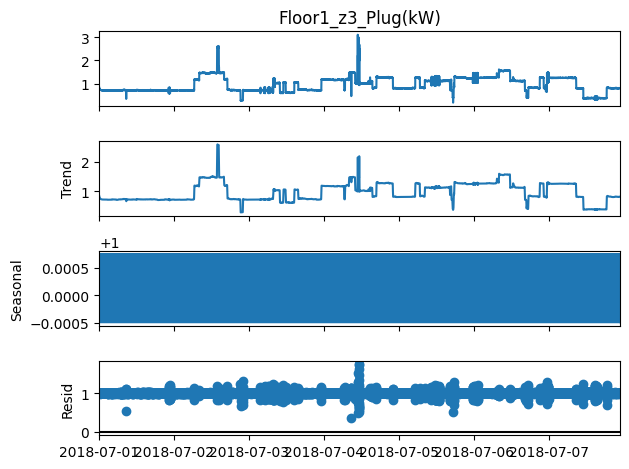

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# ETS Decomposition
result = seasonal_decompose(df_data[feature_selected],  period=6,
                            model ='multiplicative')

# ETS plot
result.plot()

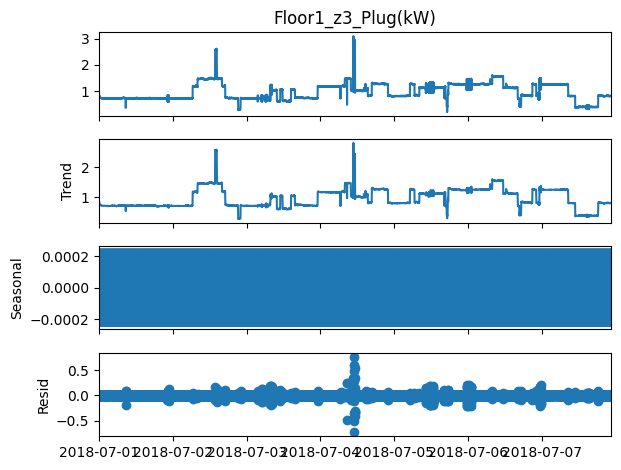

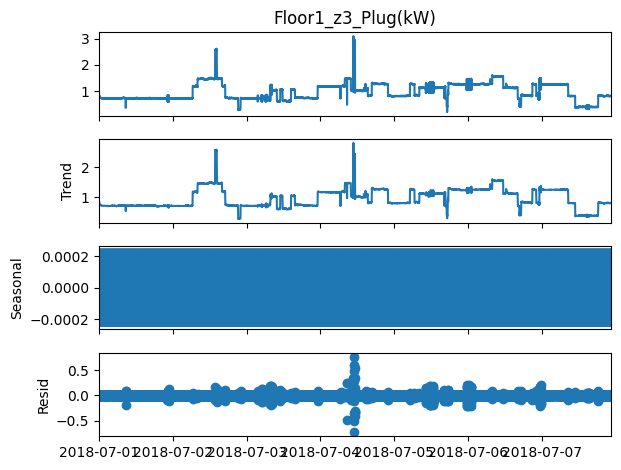

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# ETS Decomposition
result = seasonal_decompose(df_data[feature_selected], period=2,
                            model ='additive')

# ETS plot
result.plot()

In [24]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.5 MB/s eta 0:00:00


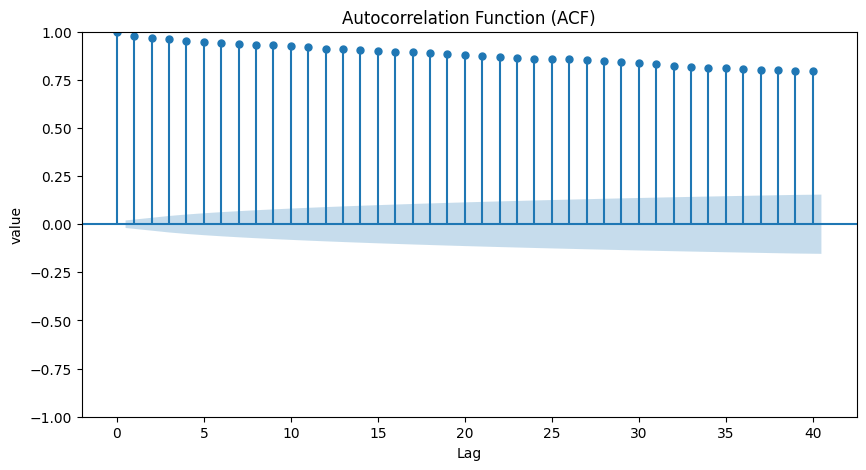

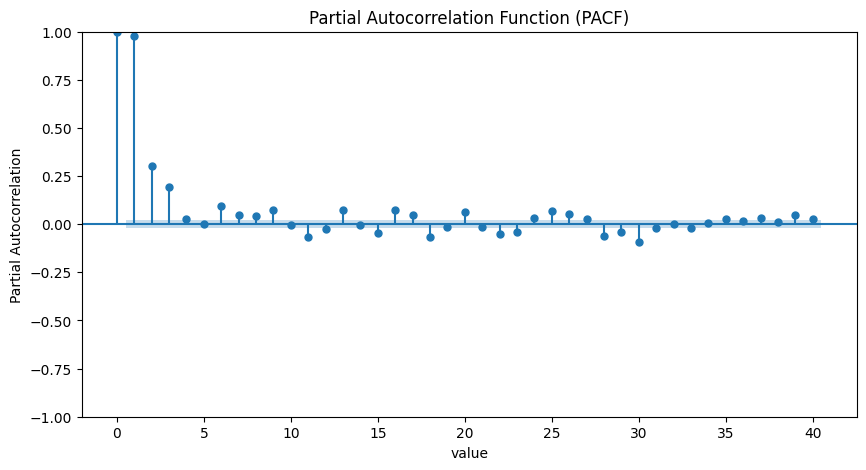

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_data[feature_selected], ax=ax)
plt.xlabel('Lag')
plt.ylabel('value')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df_data[feature_selected], ax=ax)
plt.xlabel('value')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [26]:
df_copy = df_data[:5000]

In [27]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(df_copy[feature_selected], start_p = 1, start_q = 1,
                          max_p = 5, max_q = 5, m = 5,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[5] intercept   : AIC=inf, Time=32.25 sec
 ARIMA(0,0,0)(0,1,0)[5] intercept   : AIC=-6628.655, Time=0.64 sec
 ARIMA(1,0,0)(1,1,0)[5] intercept   : AIC=-10007.883, Time=10.47 sec
 ARIMA(0,0,1)(0,1,1)[5] intercept   : AIC=-9228.040, Time=6.61 sec
 ARIMA(0,0,0)(0,1,0)[5]             : AIC=-6630.504, Time=0.27 sec
 ARIMA(1,0,0)(0,1,0)[5] intercept   : AIC=-8140.439, Time=0.79 sec
 ARIMA(1,0,0)(2,1,0)[5] intercept   : AIC=-10200.430, Time=13.75 sec
 ARIMA(1,0,0)(2,1,1)[5] intercept   : AIC=-11180.240, Time=26.95 sec
 ARIMA(1,0,0)(1,1,1)[5] intercept   : AIC=-11163.625, Time=22.60 sec
 ARIMA(1,0,0)(2,1,2)[5] intercept   : AIC=-11329.366, Time=31.57 sec
 ARIMA(1,0,0)(1,1,2)[5] intercept   : AIC=inf, Time=26.85 sec
 ARIMA(0,0,0)(2,1,2)[5] intercept   : AIC=-7520.558, Time=16.61 sec
 ARIMA(2,0,0)(2,1,2)[5] intercept   : AIC=inf, Time=40.04 sec
 ARIMA(1,0,1)(2,1,2)[5] intercept   : AIC=inf, Time=41.11 sec
 ARIMA(0,0,1)(2,1,2)[5] inte

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                 5000
Model:             SARIMAX(1, 0, 0)x(2, 1, [1, 2], 5)   Log Likelihood                5676.079
Date:                                Sat, 27 Jan 2024   AIC                         -11340.158
Time:                                        21:59:23   BIC                         -11301.061
Sample:                                    07-01-2018   HQIC                        -11326.454
                                         - 07-04-2018                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9001      0.002    456.141      0.000       0.896       0.904
ar.S.L5       -0.8866      0.018    -50.047      0.000      -0.921      -0.852
ar.S.L10       0.0309      0.006      5.184      0.000       0.019       0.043
ma.S.L5       -0.1878      0.018    -10.381      0.000      -0.223      -0.152
ma.S.L10      -0.7046      0.018    -39.261      0.000      -0.740      -0.669
sigma2         0.0060   1.87e-05    321.582      0.000       0.006       0.006
===================================================================================
Ljung-Box (L1) (Q):                 198.03   Jarque-Bera (JB):          10118065.44
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              28.91   Skew:                             1.66
Prob(H) (two-sided):                  0.00   Kurtosis:                       223.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
import statsmodels.api as sm

<Axes: xlabel='Date'>

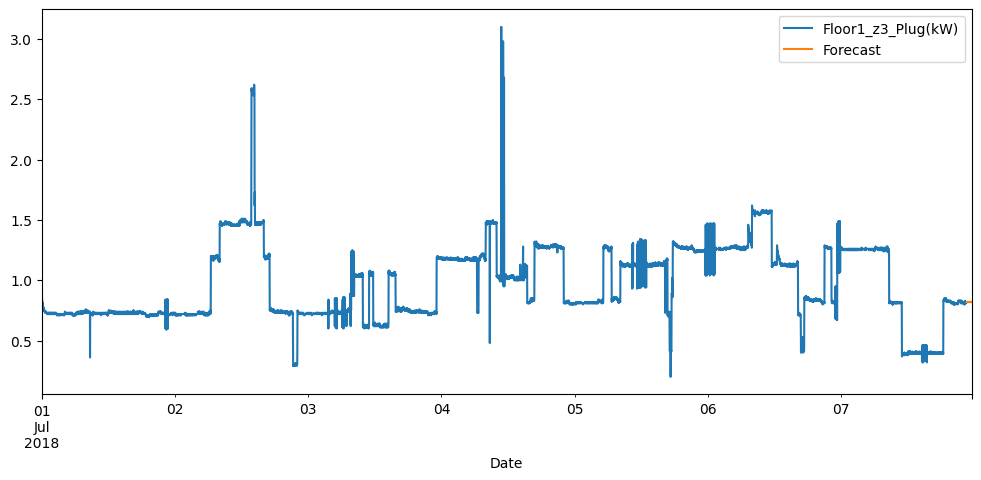

In [29]:

# Train the model on part of the dataset
model = sm.tsa.statespace.SARIMAX(df_data[feature_selected],
                        order = (3,1,0),
                        seasonal_order =(2,1,1, 5))
result = model.fit()

# Forecast for the next 3 month
forecast = result.predict(start = len(df_data)-3,
                          end = len((df_data-3))+ 50,
                          typ = 'levels').rename('Forecast')

forecast = forecast.map(lambda x: float(x))

# Plot the forecast values
df_data[feature_selected].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)


<Axes: xlabel='Date'>

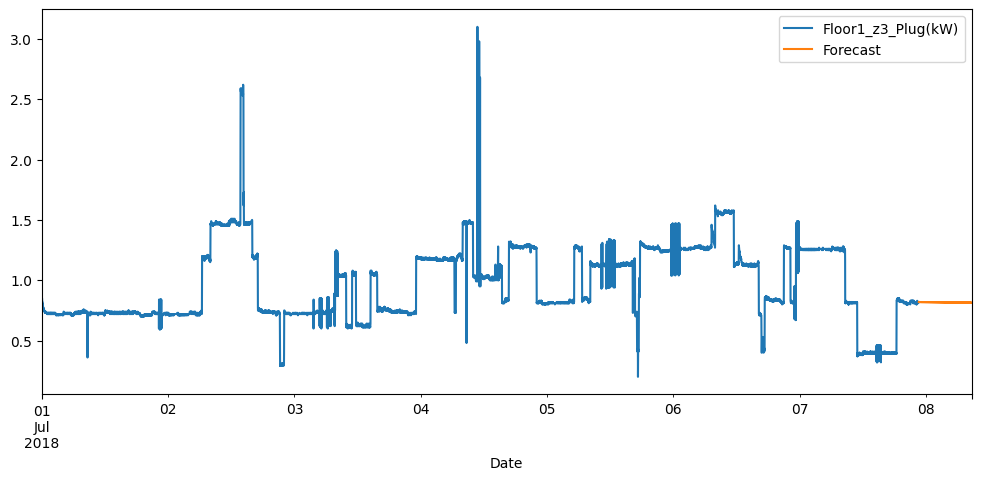

In [32]:
# Forecast for the next 3 month
forecast = result.predict(start = len(df_data)-3,
                          end = len((df_data-3))+ 600, dynamic=True,
                          typ = 'levels').rename('Forecast')

forecast = forecast.map(lambda x: float(x))

# Plot the forecast values
df_data[feature_selected].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)


In [ ]:
df_data

,Floor1_z1_Light(kW),Floor1_z1_Plug(kW),Floor1_z2_AC1(kW),Floor1_z2_AC2(kW),Floor1_z2_AC3(kW),Floor1_z2_AC4(kW),Floor1_z2_Light(kW),Floor1_z2_Plug(kW),Floor1_z3_Light(kW),Floor1_z3_Plug(kW),...,Floor7_z4_Plug(kW),Floor7_z4_S1(RH%),Floor7_z4_S1(degC),Floor7_z4_S1(lux),Floor7_z5_AC1(kW),Floor7_z5_Light(kW),Floor7_z5_Plug(kW),Floor7_z5_S1(RH%),Floor7_z5_S1(degC),Floor7_z5_S1(lux)
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,...,0.0,65.16,29.40,0.0,0.0,0.0,0.03,66.72,28.93,0.0
2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,...,0.0,65.17,29.30,0.0,0.0,0.0,0.03,66.70,28.92,0.0
2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,...,0.0,65.18,29.30,0.0,0.0,0.0,0.05,66.70,28.92,0.0
2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,...,0.0,65.18,29.30,0.0,0.0,0.0,0.14,66.70,28.92,0.0
2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,...,0.0,65.18,29.40,0.0,0.0,0.0,0.13,66.70,28.92,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-07 22:35:00,13.07,18.50,45.69,0.03,0.01,0.00,16.29,16.68,27.19,0.82,...,0.0,61.78,28.86,0.0,0.0,0.0,0.03,63.72,28.71,0.0
2018-07-07 22:36:00,13.05,18.47,45.62,0.03,0.01,0.00,16.27,16.64,26.07,0.82,...,0.0,61.80,28.86,0.0,0.0,0.0,0.03,63.72,28.70,0.0
2018-07-07 22:37:00,13.04,18.47,45.70,0.03,0.01,0.00,16.26,16.28,18.81,0.82,...,0.0,61.81,28.86,0.0,0.0,0.0,0.03,63.72,28.70,0.0


In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
# contrived dataset

# fit model
model = AutoReg(df_data[feature_selected])
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(df_data[feature_selected]))
print(yhat)

2018-07-01 00:00:00         NaN
2018-07-01 00:01:00    0.891914
2018-07-01 00:02:00    0.872397
2018-07-01 00:03:00    0.862638
2018-07-01 00:04:00    0.852879
                         ...   
2018-07-07 22:36:00    0.823603
2018-07-07 22:37:00    0.823603
2018-07-07 22:38:00    0.823603
2018-07-07 22:39:00    0.823603
2018-07-07 22:40:00    0.823603
Freq: T, Length: 10001, dtype: float64


In [ ]:
series = df_data.resample('H').mean() # hour resample
# series = series.resample('6H').mean() # 6 hour

In [ ]:
df_data.plot()

NameError: name 'df_data' is not defined

In [ ]:
# Prepare data for modeling
df_temp = series.reset_index().copy()
df_temp = df_temp.dropna()

# Add timestamp features
df_temp['weekday'] = df_temp['Date'].dt.weekday
df_temp['hour'] = df_temp['Date'].dt.hour
df_temp['date'] =pd.to_datetime(df_temp['Date'].dt.date)

df_temp = df_temp.set_index('Date').drop(['date'],axis=1)

df_temp = df_temp.rename(columns={0:'total_demand_meas'})

df_temp

<Axes: xlabel='weekday,hour'>

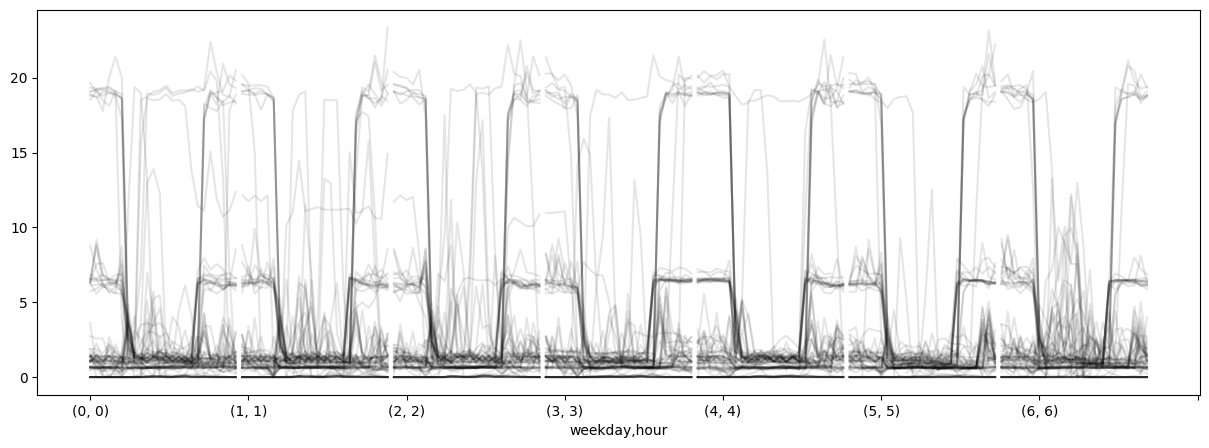

In [ ]:
# Weekly profiles of building energy
df_plot = df_temp.copy()
df_plot['date'] = pd.to_datetime(df_plot.index.date)
df_plot.pivot_table(columns=['weekday','hour'], index='date', values='total_demand_meas').T.plot(figsize=(15,5),color='black',alpha=0.1,legend=False)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import time

import datetime as datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot



import requests

import lightgbm as lgb

In [ ]:
pip install cufflinks --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.3 MB/s eta 0:00:00


In [ ]:
import cufflinks as cf
cf.set_config_file(offline=True)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 8754, number of used features: 2
[LightGBM] [Info] Start training from score 2.923194
MAPE: inf
NMBE: -100.96
CVRSME: 194.3
R SQUARED: -0.39


<Axes: xlabel='Date'>

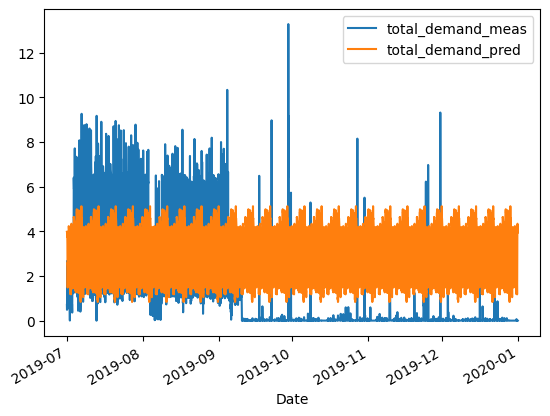

In [ ]:


traindata = df_temp.loc['2018-7':'2019-6'].copy()
testdata = df_temp.loc['2019-7':].copy()

train_labels = traindata['total_demand_meas']
test_labels = testdata['total_demand_meas']

train_features = traindata.drop('total_demand_meas', axis=1)
test_features = testdata.drop('total_demand_meas', axis=1)

LGB_model = lgb.LGBMRegressor()
LGB_model.fit(train_features, train_labels)

testdata['total_demand_pred'] = LGB_model.predict(test_features)

df_temp.loc[testdata.index, 'total_demand_pred'] = testdata['total_demand_pred']

# Calculate the absolute errors
errors = abs(testdata['total_demand_pred'] - test_labels)

# Calculate mean absolute percentage error (MAPE) and add to list
MAPE = 100 * np.mean((errors / test_labels))
NMBE = 100 * (sum(testdata.dropna()['total_demand_meas'] - testdata.dropna()['total_demand_pred']) / (testdata.dropna()['total_demand_meas'].count() * np.mean(testdata.dropna()['total_demand_meas'])))
CVRSME = 100 * ((sum((testdata.dropna()['total_demand_meas'] - testdata.dropna()['total_demand_pred'])**2) / (testdata.dropna()['total_demand_meas'].count()-1))**(0.5)) / np.mean(testdata.dropna()['total_demand_meas'])
RSQUARED = r2_score(testdata.dropna()['total_demand_meas'], testdata.dropna()['total_demand_pred'])

print("MAPE: "+str(round(MAPE,2)))
print("NMBE: "+str(round(NMBE,2)))
print("CVRSME: "+str(round(CVRSME,2)))
print("R SQUARED: "+str(round(RSQUARED,2)))

testdata[['total_demand_meas', 'total_demand_pred']].plot()



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 8754, number of used features: 2
[LightGBM] [Info] Start training from score 2.923194
MAPE: inf
NMBE: -100.96
CVRSME: 194.3
R SQUARED: -0.39


<Axes: xlabel='Date'>

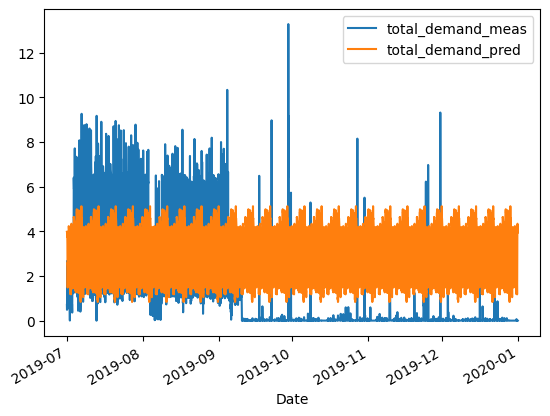

In [ ]:
traindata = df_temp.loc['2018-7':'2019-6'].copy()
testdata = df_temp.loc['2019-7':].copy()

train_labels = traindata['total_demand_meas']
test_labels = testdata['total_demand_meas']

train_features = traindata.drop('total_demand_meas', axis=1)
test_features = testdata.drop('total_demand_meas', axis=1)

LGB_model = lgb.LGBMRegressor()
LGB_model.fit(train_features, train_labels)

testdata['total_demand_pred'] = LGB_model.predict(test_features)

df_temp.loc[testdata.index, 'total_demand_pred'] = testdata['total_demand_pred']

# Calculate the absolute errors
errors = abs(testdata['total_demand_pred'] - test_labels)

# Calculate mean absolute percentage error (MAPE) and add to list
MAPE = 100 * np.mean((errors / test_labels))
NMBE = 100 * (sum(testdata.dropna()['total_demand_meas'] - testdata.dropna()['total_demand_pred']) / (testdata.dropna()['total_demand_meas'].count() * np.mean(testdata.dropna()['total_demand_meas'])))
CVRSME = 100 * ((sum((testdata.dropna()['total_demand_meas'] - testdata.dropna()['total_demand_pred'])**2) / (testdata.dropna()['total_demand_meas'].count()-1))**(0.5)) / np.mean(testdata.dropna()['total_demand_meas'])
RSQUARED = r2_score(testdata.dropna()['total_demand_meas'], testdata.dropna()['total_demand_pred'])

print("MAPE: "+str(round(MAPE,2)))
print("NMBE: "+str(round(NMBE,2)))
print("CVRSME: "+str(round(CVRSME,2)))
print("R SQUARED: "+str(round(RSQUARED,2)))

testdata[['total_demand_meas', 'total_demand_pred']].plot()

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

# Assuming df_temp is your historical dataset
# Assuming df_weather and df_holiday_encode are your historical weather and holiday datasets
# Assuming LGB_model is your trained model

# Choose a start date and end date for February 2020
start_date = datetime(2020, 2, 1)
end_date = datetime(2020, 2, 29, 23, 59)

# Create a date range for February 2020
date_range = pd.date_range(start=start_date, end=end_date, freq='H')

# Create a DataFrame for February 2020 with similar structure
df_synth = pd.DataFrame(index=date_range)

# Add timestamp features
df_synth['weekday'] = df_synth.index.weekday
df_synth['hour'] = df_synth.index.hour
df_synth['date'] = df_synth.index.date

# Merge with historical weather data
df_synth = df_synth.merge(df_weather.reset_index(), left_on='date', right_on='index')

# Merge with encoded holiday features
df_synth = df_synth.merge(df_holiday_encode, on='date')

# Drop unnecessary columns
df_synth = df_synth.drop(['date', 'index'], axis=1)

# Rename the column to match your model's expectations
df_synth = df_synth.rename(columns={'total_demand': 'total_demand_meas'})

# Predict the total demand for February 2020
features = df_synth.drop('total_demand_meas', axis=1)
df_synth['total_demand_pred'] = LGB_model.predict(features)

# Display the synthetic dataset
print(df_synth[['total_demand_meas', 'total_demand_pred']])


NameError: name 'df_weather' is not defined